In [3]:
!pip install pandas

    100% |████████████████████████████████| 24.3MB 47kB/s  eta 0:00:01
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import spotipy
from spotipy import util
from config import config
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id=config['spotify_id'], client_secret=config['spotify_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Quick tools

### check # of (all) labelled songs

In [15]:
l = pd.read_json('labelled', orient='rows')
print(l.shape[1])

181


## Exploring initial labelled data

### Grab song features from Spotify

In [ ]:
json = json.load(open('labelled_sample'))

In this step I'm also going to modify the mood label so it's a consistent vector 

In [85]:
def mood_vector(moods, readable):
    positions = {'chill':0, 'hype':1, 'happy':2, 'sad':3}
    p_list = ['chill', 'hype', 'happy', 'sad']
    vector = [0,0,0,0]
    for mood in moods:
        vector[positions[mood]] = 1
    
    output = ""
    if readable:
        string = ""
        for i, val in enumerate(vector):
            if val:
                string += p_list[i] + " "
        output = string[:-1]
    else:
        output = str(vector)
    return output


In [90]:
sample = []
for row in json:
    label = mood_vector(json[row]['mood'], True)
    moods = label.split()
    sample.append([row,json[row]['name'],label,moods[0],moods[1]])
songs = pd.DataFrame(sample, columns=['id','title','label','mood1','mood2']).set_index('id')
songs.head()

,title,label,mood1,mood2
id,,,,
5ClmYd83GFMM8Unue3dqKJ,Bands,hype happy,hype,happy
49fT6owWuknekShh9utsjv,Feedback,hype happy,hype,happy
1yWpTxNpz61uFb2Y4He9Xe,Still In Love,chill sad,chill,sad
0ixzR1LXNfGuect63Q58dA,BOY,chill happy,chill,happy
2QmU4B8fsyWcTQLVDl06Pk,Spice,chill happy,chill,happy


In [87]:
#remember that max of 50 ids for features
features = sp.audio_features(songs.index.tolist())
params = pd.DataFrame(features).drop(columns=['analysis_url','track_href','uri','type']).set_index('id')
params.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
id,,,,,,,,,,,,,
5ClmYd83GFMM8Unue3dqKJ,0.2100,0.834,98734,0.457,0.000000,10,0.0641,-10.775,1,0.5720,158.008,4,0.533
49fT6owWuknekShh9utsjv,0.5930,0.837,147240,0.562,0.000000,1,0.1040,-6.038,1,0.4920,100.170,4,0.149
1yWpTxNpz61uFb2Y4He9Xe,0.0485,0.466,206480,0.690,0.000000,8,0.2010,-5.186,1,0.0857,153.504,3,0.478
0ixzR1LXNfGuect63Q58dA,0.5620,0.554,265160,0.739,0.000026,3,0.1110,-7.869,0,0.4430,80.061,4,0.368
2QmU4B8fsyWcTQLVDl06Pk,0.5140,0.574,219648,0.451,0.000000,6,0.0823,-10.803,0,0.1910,83.950,4,0.616


In [91]:
data = songs.join(params)
data.head()

,title,label,mood1,mood2,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
id,,,,,,,,,,,,,,,,,
5ClmYd83GFMM8Unue3dqKJ,Bands,hype happy,hype,happy,0.2100,0.834,98734,0.457,0.000000,10,0.0641,-10.775,1,0.5720,158.008,4,0.533
49fT6owWuknekShh9utsjv,Feedback,hype happy,hype,happy,0.5930,0.837,147240,0.562,0.000000,1,0.1040,-6.038,1,0.4920,100.170,4,0.149
1yWpTxNpz61uFb2Y4He9Xe,Still In Love,chill sad,chill,sad,0.0485,0.466,206480,0.690,0.000000,8,0.2010,-5.186,1,0.0857,153.504,3,0.478
0ixzR1LXNfGuect63Q58dA,BOY,chill happy,chill,happy,0.5620,0.554,265160,0.739,0.000026,3,0.1110,-7.869,0,0.4430,80.061,4,0.368
2QmU4B8fsyWcTQLVDl06Pk,Spice,chill happy,chill,happy,0.5140,0.574,219648,0.451,0.000000,6,0.0823,-10.803,0,0.1910,83.950,4,0.616


## Graphs! Stats!

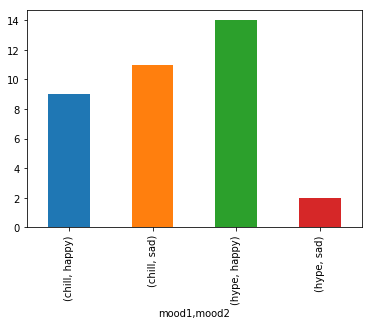

In [130]:
data.groupby(['mood1','mood2']).title.count().plot(kind='bar')

Let's look at correlations between danceability between labels

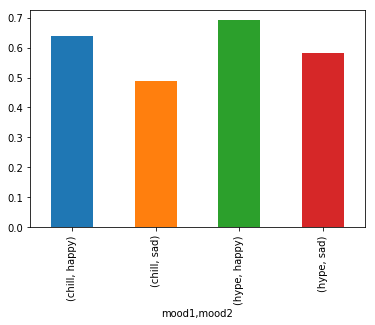

In [107]:
dancey = data.groupby(['mood1','mood2'])['danceability'].mean().plot(kind='bar')

looking at moods seperately

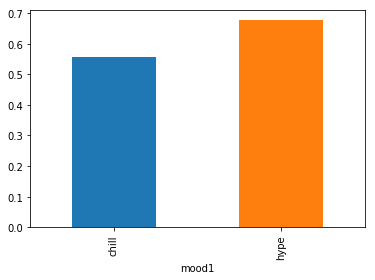

In [103]:
graph = data.groupby(['mood1'])['danceability'].mean().plot(kind='bar')

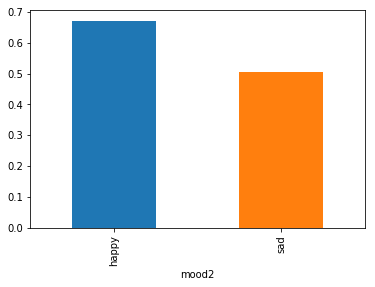

In [104]:
graph = data.groupby(['mood2'])['danceability'].mean().plot(kind='bar')

Maybe energy?

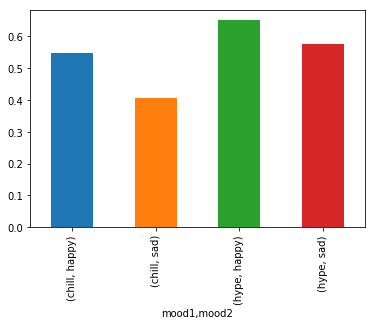

In [108]:
energy = data.groupby(['mood1','mood2'])['energy'].mean().plot(kind='bar')

Tempo

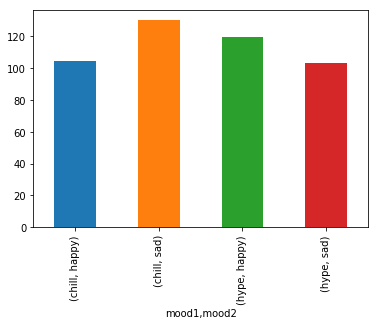

In [109]:
tempo = data.groupby(['mood1','mood2'])['tempo'].mean().plot(kind='bar')

That's strange, but this is a small and particular dataset

Will take a gander at mode and valence

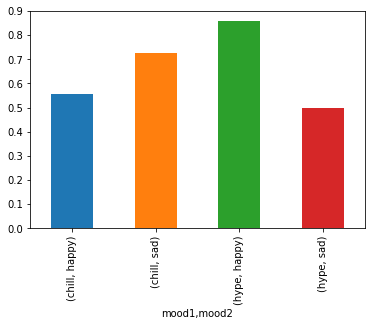

In [123]:
mode = data.groupby(['mood1','mood2'])['mode'].mean().plot(kind='bar')

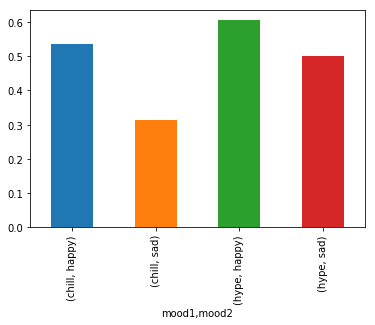

In [124]:
valence = data.groupby(['mood1','mood2'])['valence'].mean().plot(kind='bar')

Nice, this makes sense!